In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [13]:
import numpy as np
import librosa
import librosa.display
from scipy import fftpack
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

from IPython.display import Audio

import plotly.graph_objs as go
import plotly.plotly as py
import plotly

# %matplotlib inline
plt.rc('figure', figsize=(14, 6))

In [4]:
# plt.ioff()

In [4]:
go.Mesh3d??

In [6]:
plotly.tools.set_credentials_file(username='louis_cauchy', api_key='kL9wATGK2n1LNo0RJFeV')

In [64]:
!ls RAVDESS/renamed_sources/Actor_01_cp

angry-normal-01-01-male.wav    fearful-strong-02-01-male.wav
angry-normal-01-02-male.wav    fearful-strong-02-02-male.wav
angry-normal-02-01-male.wav    happy-normal-01-01-male.wav
angry-normal-02-02-male.wav    happy-normal-01-02-male.wav
angry-strong-01-01-male.wav    happy-normal-02-01-male.wav
angry-strong-01-02-male.wav    happy-normal-02-02-male.wav
angry-strong-02-01-male.wav    happy-strong-01-01-male.wav
angry-strong-02-02-male.wav    happy-strong-01-02-male.wav
calm-normal-01-01-male.wav     happy-strong-02-01-male.wav
calm-normal-01-02-male.wav     happy-strong-02-02-male.wav
calm-normal-02-01-male.wav     neutral-normal-01-01-male.wav
calm-normal-02-02-male.wav     neutral-normal-01-02-male.wav
calm-strong-01-01-male.wav     neutral-normal-02-01-male.wav
calm-strong-01-02-male.wav     neutral-normal-02-02-male.wav
calm-strong-02-01-male.wav     sad-normal-01-01-male.wav
calm-strong-02-02-male.wav     sad-normal-01-02-male.wav
disgust-normal-01-01-male.wav  sad-normal-02-01-

In [27]:
path = 'RAVDESS/Actor_01_cp'
file = '/neutral-normal-02-01-male.wav'
# file = '/angry-strong-01-01-male.wav'
# file = '/sad-strong-02-02-male.wav'
# file = '/fearful-strong-01-02-male.wav'

In [28]:
audio, sampling_rate = librosa.core.load(path+file, sr=48000)

In [29]:
Audio(path+file)

In [21]:
# sampling_rate, audio = wavfile.read(path + file)

In [6]:
audio

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [7]:
sampling_rate

48000

In [8]:
# signal.spectrogram??

In [30]:
M = 500
n = 250

In [31]:
freqs, times, Sx = signal.spectrogram(audio, fs=sampling_rate, window='hanning',
                                      nperseg = M, noverlap= M - n,
                                      detrend=False, scaling='spectrum')

# nperseg : int, optional
#         Length of each segment. Defaults to None, but if window is str or
#         tuple, is set to 256, and if window is array_like, is set to the
#         length of the window.
#     noverlap : int, optional
#         Number of points to overlap between segments. If `None`,
#         ``noverlap = nperseg // 8``. Defaults to `None`.

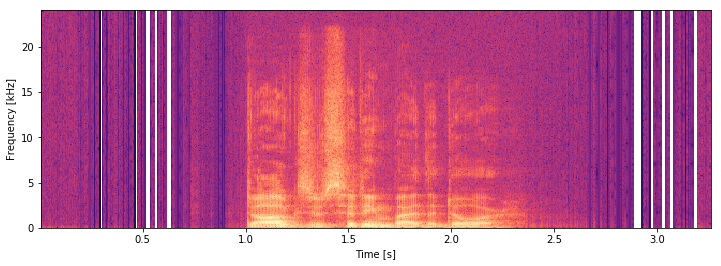

In [32]:
f, ax = plt.subplots()
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='magma')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');
f.set_size_inches(12, 4)
plt.savefig('test.png')

In [40]:
librosa.feature.melspectrogram??

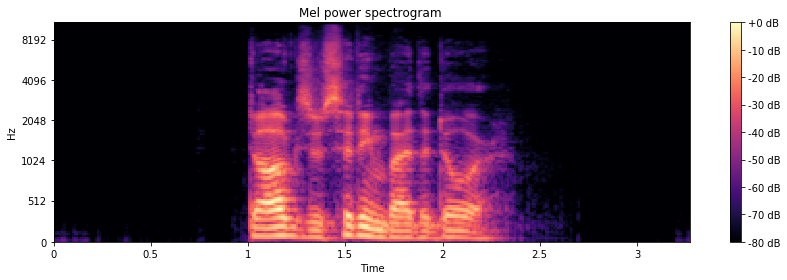

In [33]:
S = librosa.feature.melspectrogram(audio, sr=sampling_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

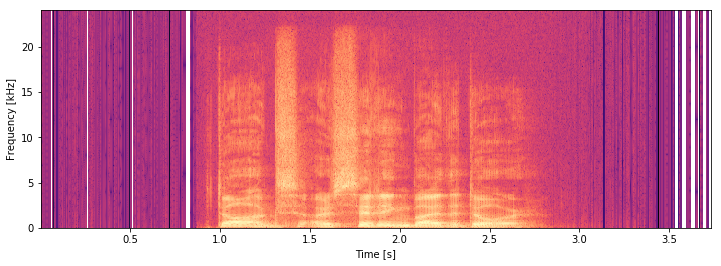

In [17]:
f, ax = plt.subplots()
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='magma')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');
f.set_size_inches(12, 4)
plt.savefig('test.png')

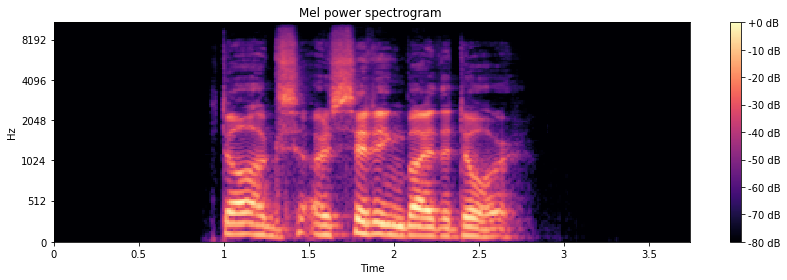

In [15]:
S = librosa.feature.melspectrogram(audio, sr=sampling_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

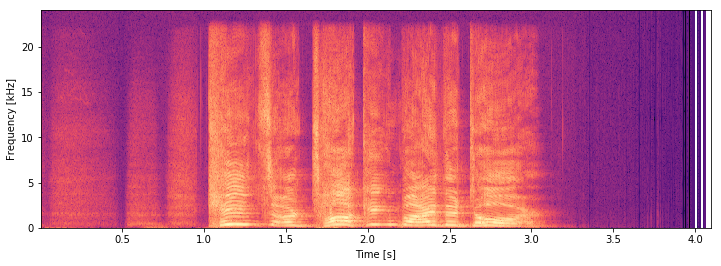

In [23]:
f, ax = plt.subplots()
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='magma')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');
f.set_size_inches(12, 4)
plt.savefig('test.png')

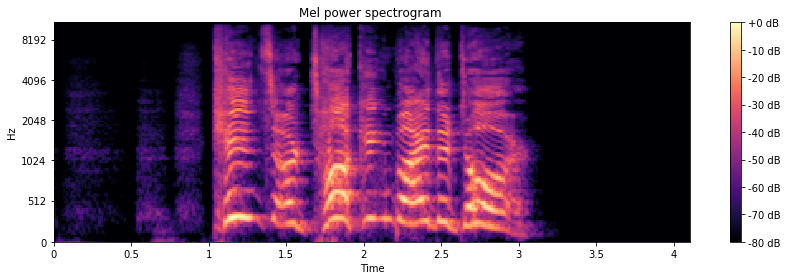

In [24]:
S = librosa.feature.melspectrogram(audio, sr=sampling_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

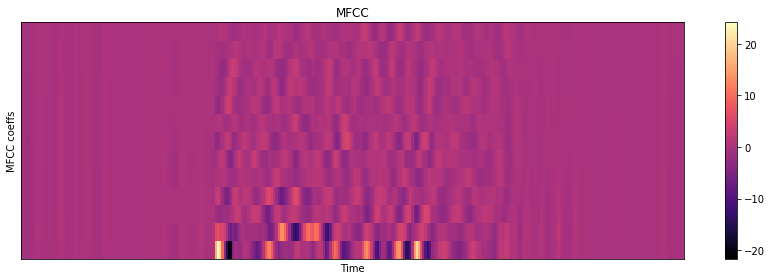

In [39]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc, cmap='magma')
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [37]:
freqs, Pxx = signal.periodogram(audio, fs=sampling_rate, window='hanning',detrend=False, scaling='spectrum')

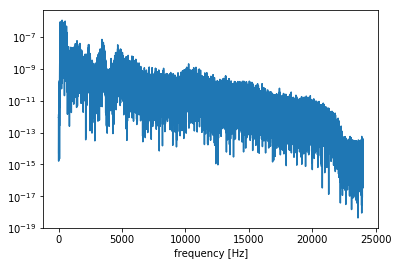

In [28]:
plt.semilogy(freqs, Pxx)
plt.xlabel('frequency [Hz]')
plt.show()

In [73]:
times.shape

(786,)

In [74]:
freqs.shape

(251,)

In [75]:
Sx.shape

(251, 786)

In [76]:
Audio(path + file)

In [26]:
# freqs, times, Sx = signal.spectrogram(audio, fs=sampling_rate, window='hanning',
#                                       nperseg=1024, noverlap=M - 100,
#                                       detrend=False, scaling='spectrum')

In [43]:
ax.pcolormesh??

In [51]:
Sx[0:10, 0:10].shape

(10, 10)

In [55]:
go.Heatmap??

In [83]:
# trace = go.Heatmap(z=Sx, colorscale='Blackbody')
# data=[trace]
# py.iplot(data)

In [21]:
f, ax = plt.subplots()
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='magma')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');
f.set_size_inches(23, 14)
plt.savefig('test.png')

In [17]:
plt.savefig??

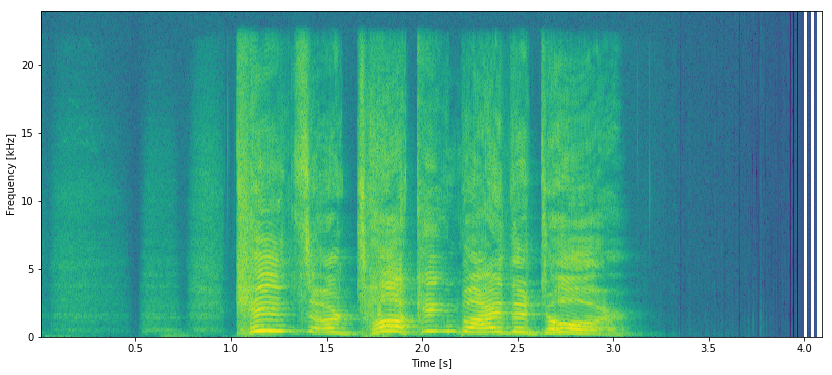

In [27]:
# angry
f, ax = plt.subplots()
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

In [37]:
# # angry
# f, ax = plt.subplots()
# ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
# ax.set_ylabel('Frequency [kHz]')
# ax.set_xlabel('Time [s]');

In [38]:
# # angry
# f, ax = plt.subplots()
# ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
# ax.set_ylabel('Frequency [kHz]')
# ax.set_xlabel('Time [s]');

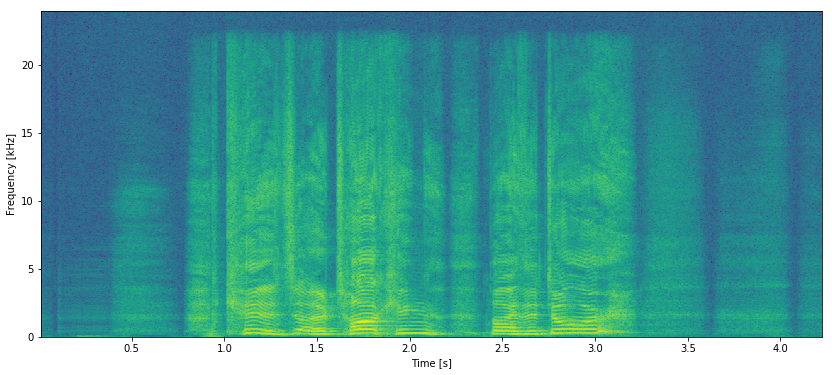

In [56]:
# fearful
f, ax = plt.subplots()
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

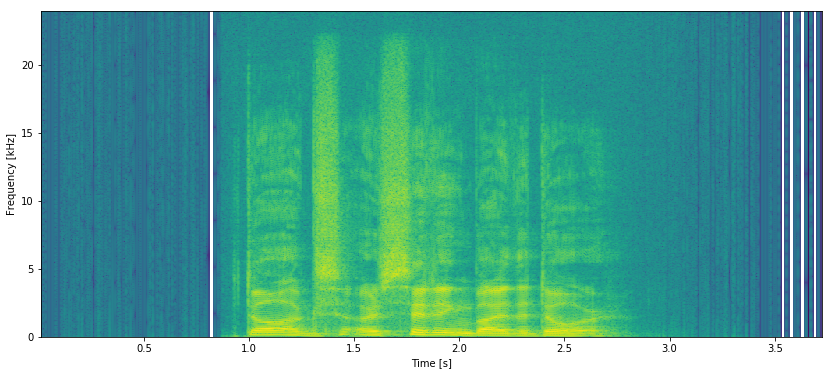

In [23]:
# sad!!!
f, ax = plt.subplots()
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');